# DSCI 503 - Project 2

### Daniel Carter

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

The purpose of this function is to simulate the price of a stock on a set period of time

In [2]:
def simulate_stock(start, rate, vol, days):
    scaled_rate = rate/252
    scaled_vol = vol/math.sqrt(252)
    
    daily_yields = np.random.normal(scaled_rate, scaled_vol, days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_daily_prices = np.round(daily_multipliers * start, 2)
    simulated_stock = np.insert(simulated_daily_prices, 0, float(start))
    return simulated_stock

This next cell is to test functionallity of the function created above

Last price: 514.44


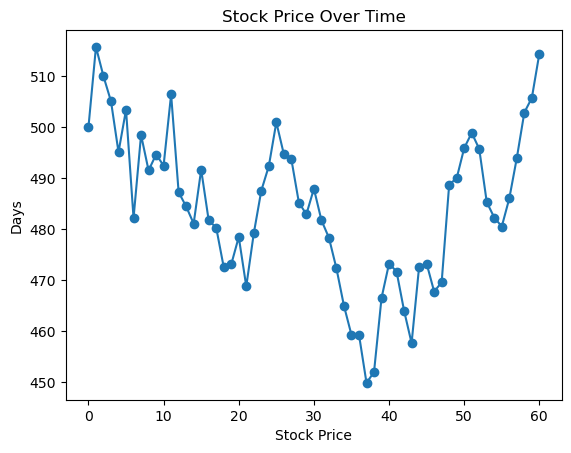

In [3]:
np.random.seed(1)
prices = simulate_stock(500, .08, .3, 60)
print(f'Last price: {prices[-1]}')
plt.plot(prices, marker='o')
plt.title('Stock Price Over Time')
plt.xlabel('Stock Price')
plt.ylabel('Days')
plt.show()

## Part B: Annual Yield Function

The purpose of this part is to calculate the annual yield of a stock

In [4]:
def find_yield(run):
    annual_yield = math.log((run[-1]/run[0]))*(252/(len(run)-1))
    
    return annual_yield

This is to test the functionallity of the function created above

In [5]:
find_yield(prices)

0.11957749429791611

This cell will explore the potential variablility in our simulated runs by creating and plotting 25 simulated runs

Text(0, 0.5, 'Run Number')

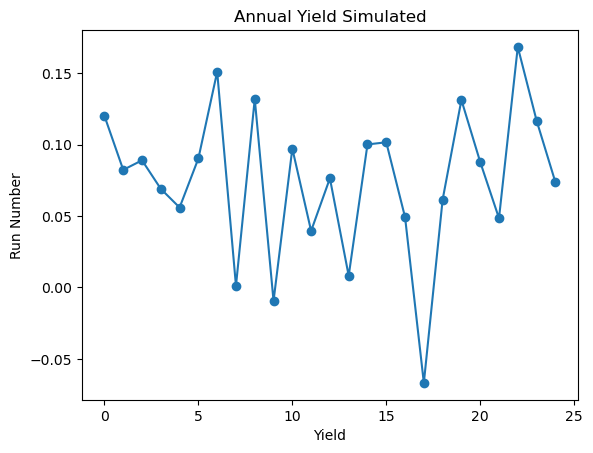

In [6]:
yield_list = []
for run in range(0, 25):
    price = simulate_stock(100,.06,.04,200)
    annual_yield = find_yield(price)
    yield_list.append(annual_yield)
plt.plot(yield_list, marker='o')
plt.title('Annual Yield Simulated')
plt.xlabel('Yield')
plt.ylabel('Run Number')


Show the yields of the 25 simulated runs


In [7]:
print(yield_list)

[0.12009082655344942, 0.0823025273120095, 0.08901249785735826, 0.06901301716719414, 0.05594347999382249, 0.09030330122985321, 0.15097999526611916, 0.001133490005973632, 0.13194759157070785, -0.00948561569019732, 0.09720422356258371, 0.03956622155580987, 0.07638702348870789, 0.008163497283113432, 0.10011698088174155, 0.10162895780199273, 0.04917576757902278, -0.06688630757649366, 0.061475606853484376, 0.13126657182617654, 0.08783789163823844, 0.04844849483155859, 0.16840704486396876, 0.11687946490245196, 0.07377537755651552]


## Part C: Finding Seeds that Generate Specific Outcomes

The purpose of this part is to determine a random seed in which a certain stock has the highest final price

In the cell below, Stock A has the highest simulated final price

Final Prices:
 Stock A: 479.94
 Stock B: 107.46
 Stock C: 70.69


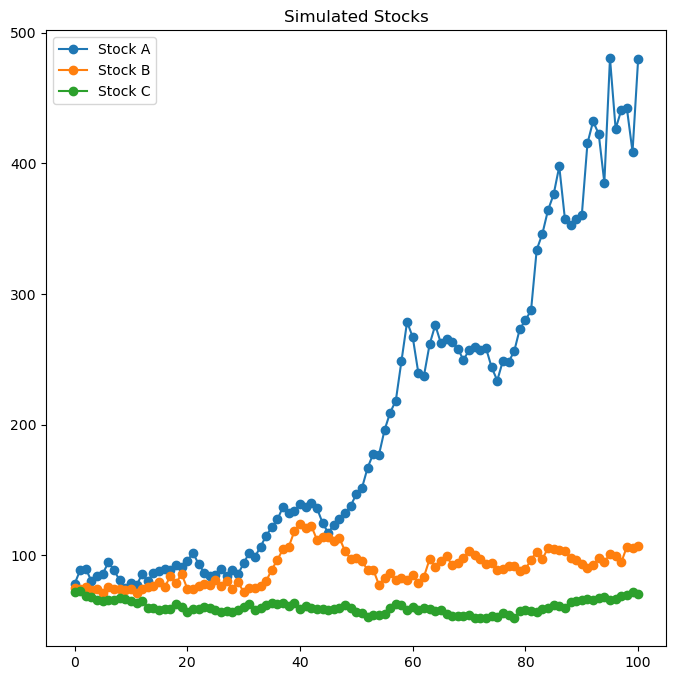

In [8]:
np.random.seed(278)

stock_a = simulate_stock(78,.04,1.2,100)
stock_b = simulate_stock(75,.08,.8,100)
stock_c = simulate_stock(72,.16,.6,100)
plt.figure(figsize=[8,8])
plt.plot(stock_a, marker='o', label='Stock A')
plt.plot(stock_b, marker='o', label='Stock B')
plt.plot(stock_c, marker='o', label='Stock C')
plt.title('Simulated Stocks')
plt.legend()
print(f'Final Prices:\n Stock A: {stock_a[-1]}\n Stock B: {stock_b[-1]}\n Stock C: {stock_c[-1]}')

In this cell below Stock B has the highest simulated final price

Final Prices:
 Stock A: 92.8
 Stock B: 105.95
 Stock C: 81.5


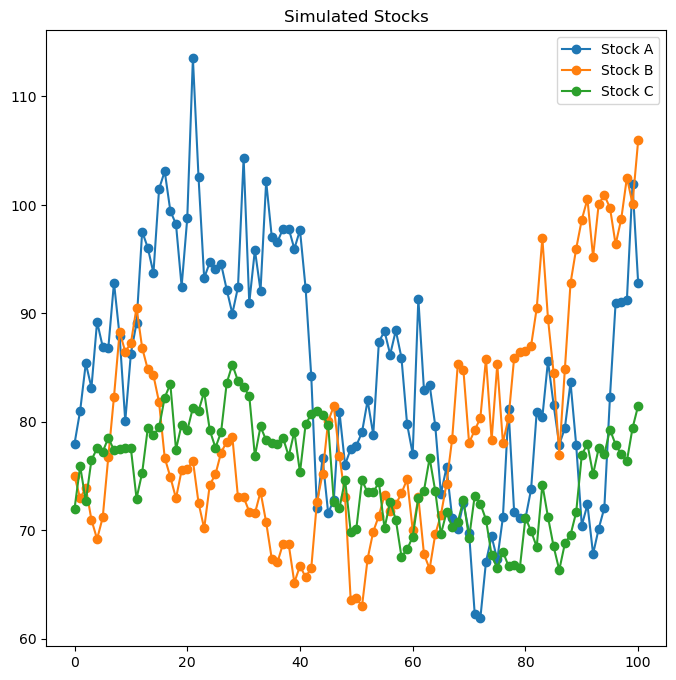

In [9]:
np.random.seed(902)

stock_a = simulate_stock(78,.04,1.2,100)
stock_b = simulate_stock(75,.08,.8,100)
stock_c = simulate_stock(72,.16,.6,100)
plt.figure(figsize=[8,8])
plt.plot(stock_a, marker='o', label='Stock A')
plt.plot(stock_b, marker='o', label='Stock B')
plt.plot(stock_c, marker='o', label='Stock C')
plt.title('Simulated Stocks')
plt.legend()
print(f'Final Prices:\n Stock A: {stock_a[-1]}\n Stock B: {stock_b[-1]}\n Stock C: {stock_c[-1]}')

This cell shows Stock C has the highest final price

Final Prices:
 Stock A: 54.24
 Stock B: 104.24
 Stock C: 109.31


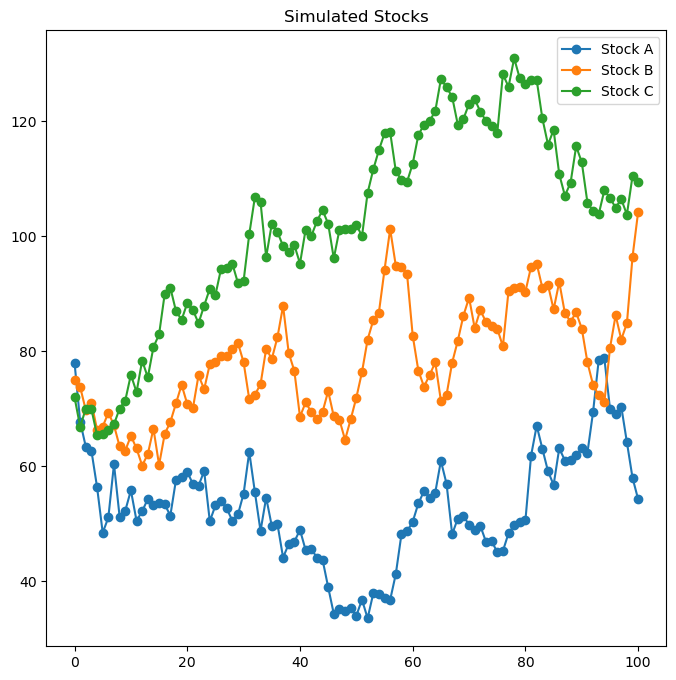

In [10]:
np.random.seed(747)

stock_a = simulate_stock(78,.04,1.2,100)
stock_b = simulate_stock(75,.08,.8,100)
stock_c = simulate_stock(72,.16,.6,100)
plt.figure(figsize=[8,8])
plt.plot(stock_a, marker='o', label='Stock A')
plt.plot(stock_b, marker='o', label='Stock B')
plt.plot(stock_c, marker='o', label='Stock C')
plt.title('Simulated Stocks')
plt.legend()
print(f'Final Prices:\n Stock A: {stock_a[-1]}\n Stock B: {stock_b[-1]}\n Stock C: {stock_c[-1]}')

## Part D: Monte Carlo Simulation

The purpose of this part is to run a Monte Carlo Sim on our functions

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for run in range(0, num_runs):
        scaled_rate = rate/252
        scaled_vol = vol/math.sqrt(252)
        daily_yields = np.random.normal(scaled_rate, scaled_vol, days)
        cumulative_yields = np.cumsum(daily_yields)
        daily_multipliers = np.exp(cumulative_yields)
        simulated_daily_prices = np.round(daily_multipliers * start, 2)
        simulated_stock = np.insert(simulated_daily_prices, 0, float(start))
        final_prices.append(simulated_stock[-1])
        annual_yield = math.log((simulated_stock[-1]/simulated_stock[0]))*(252/(len(simulated_stock)-1))
        annual_yields.append(annual_yield)
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    return final_prices, annual_yields

This is to test the function above

(array([1.600e+01, 5.630e+02, 1.383e+03, 1.675e+03, 1.591e+03, 1.272e+03,
        8.770e+02, 6.920e+02, 4.930e+02, 4.070e+02, 2.840e+02, 1.960e+02,
        1.380e+02, 1.040e+02, 8.000e+01, 6.100e+01, 3.700e+01, 4.500e+01,
        2.100e+01, 1.300e+01, 1.300e+01, 1.000e+01, 4.000e+00, 1.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550.]),
 <BarContainer object of 31 artists>)

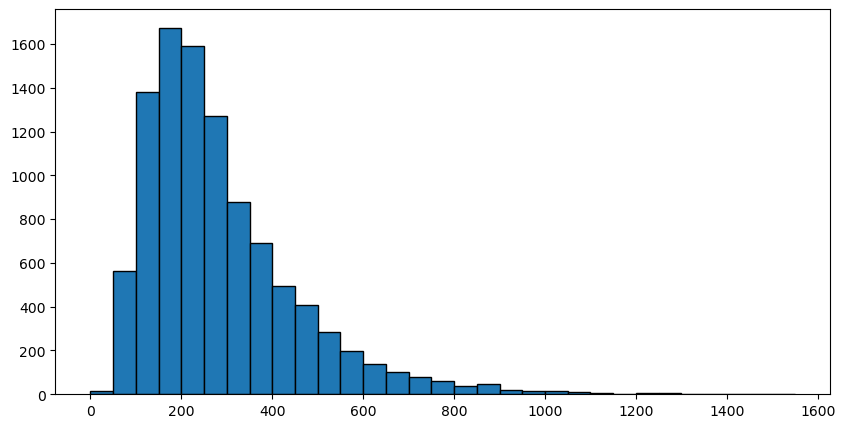

In [12]:
np.random.seed(1)

final_prices, annual_yields = monte_carlo(200, .10, .4, 500, 10000)
plt.figure(figsize=[10,5])
plt.hist(final_prices,  edgecolor='black', bins=np.arange(0,1600,50))

This cell is going to display the 10th, 25th, 50th, 75th,and 90th percentiles of the simulated final prices

In [13]:
percentile_list = [10,25,50,75,90]
for x in percentile_list:
    percentile = np.round(np.percentile(final_prices, x),2)
    print(f'The {x}th percentile: {percentile}')

The 10th percentile: 118.05
The 25th percentile: 165.57
The 50th percentile: 242.95
The 75th percentile: 357.56
The 90th percentile: 505.91


## Part E: Effects of Volatility

In this part we are going to be looking at the effects of volatility on our simulated stock prices

In [14]:
np.random.seed(1)

stock_a_final_prices, stock_a_annual_yields = monte_carlo(100,.12,.3,150,10000)
stock_b_final_prices, stock_b_annual_yields = monte_carlo(100,.12,.7,150,10000)

stock_a_avg = np.round(np.mean(stock_a_annual_yields),4)
stock_b_avg = np.round(np.mean(stock_b_annual_yields),4)

print(f'Average Annual Yield for A over 10000 runs: {stock_a_avg}')
print(f'Average Annual Yield for B over 10000 runs: {stock_b_avg}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Time to visually inspect the results of the Monte Carlo simulations by plotting histograms of the final prices

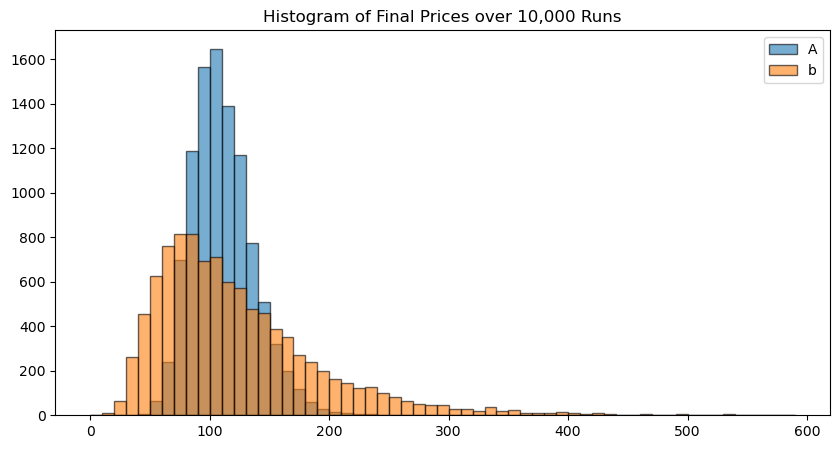

In [15]:
plt.figure(figsize=[10,5])
plt.hist(stock_a_final_prices, edgecolor='black', alpha=.6, bins=np.arange(0,600,10), label='A')
plt.hist(stock_b_final_prices, edgecolor='black', alpha=.6, bins=np.arange(0,600,10), label='b')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.legend()

## Part F: Comparing Two Stocks

In this part we will compare probablities relating the performance of two stocks

In [16]:
np.random.seed(1)
stock_a_final_prices, stock_a_annual_yields = monte_carlo(100,.08,.2,252,10000)
stock_b_final_prices, stock_b_annual_yields = monte_carlo(100,.05,.5,252,10000)
a_higher_b = np.round(np.sum(np.where(stock_a_final_prices > stock_b_final_prices, 1,0))/len(stock_a_final_prices),4)
a_higher_150 = np.round(np.sum(np.where(stock_a_final_prices > 150, 1,0))/len(stock_a_final_prices),4)
b_higher_150 = np.round(np.sum(np.where(stock_b_final_prices > 150, 1,0))/len(stock_b_final_prices),4)
a_less_100 = np.round(np.sum(np.where(stock_a_final_prices < 100, 1,0))/len(stock_a_final_prices),4)
b_less_100 = np.round(np.sum(np.where(stock_b_final_prices < 100, 1,0))/len(stock_b_final_prices),4)


print('Proportions of runs in which...')
print('----------------------')
print(f'A ends above B: {a_higher_b}')
print(f'A ends above 150: {a_higher_150}')
print(f'B ends above 150: {b_higher_150}')
print(f'A ends below 100: {a_less_100}')
print(f'B ends below 100: {b_less_100}')

Proportions of runs in which...
----------------------
A ends above B: 0.5205
A ends above 150: 0.0532
B ends above 150: 0.234
A ends below 100: 0.3422
B ends below 100: 0.4585


## Part G: Expected Call Payoff

Looking at a call option

In [17]:
np.random.seed(1)
final_prices, annual_yields = monte_carlo(200,.11,.4,150,10000)
strike = 225
payoff = final_prices - strike
payoff = np.where(payoff < 0, 0, payoff)

print(f'The average call payoff after 10,000 runs was ${np.round(np.mean(payoff),2)}')

The average call payoff after 10,000 runs was $27.1
